<a href="https://colab.research.google.com/github/thiagoscavone/analise_carteira/blob/main/company_nasdaq_analysis_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#30 biggest companiys at NASDQA, except for those used in last class
ticker_symbols = ['GOOG', 'FB', 'NVDA', 'PYPL', 'ADBE', 'CMCSA', 'NFLX', 'INTC', 'PEP', 'COST', 'AVGO', 'AMGN', 'TXN', 'SBUX', 'QCOM', 'ZM', 'CHTR', 'TMUS', 'MDLZ', 'MRNA', 'ISRG', 'BKNG', 'ADP', 'INTU', 'GILD']

In [83]:
data = []

for ticker in ticker_symbols:
  company = yf.Ticker(ticker)

  fundamental_data = company.info

  fundamental_items = {
        "Company": fundamental_data.get('longName'),
        "Sector": fundamental_data.get('sector'),
        "MarketCap": fundamental_data.get('marketCap'),
        "EnterpriseValue": fundamental_data.get('enterpriseValue'),
        "Revenue": fundamental_data.get('totalRevenue'),
        "ProfitMargin": fundamental_data.get('profitMargins'),
        "OperatingMargin": fundamental_data.get('operatingMargins'),
        "netIncome": fundamental_data.get('netIncome'),
        "dividendRate": fundamental_data.get('dividendRate'),
        "beta": fundamental_data.get('beta'),
        "ebitda": fundamental_data.get('ebitda')

    }

  data.append(fundamental_items)

df = pd.DataFrame(data)


In [84]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Company,Alphabet Inc.,None,NVIDIA Corporation,"PayPal Holdings, Inc.",Adobe Inc.,Comcast Corporation,"Netflix, Inc.",Intel Corporation,"PepsiCo, Inc.",Costco Wholesale Corporation,...,"Zoom Video Communications, Inc.","Charter Communications, Inc.","T-Mobile US, Inc.","Mondelez International, Inc.","Moderna, Inc.","Intuitive Surgical, Inc.",Booking Holdings Inc.,"Automatic Data Processing, Inc.",Intuit Inc.,"Gilead Sciences, Inc."
Sector,Communication Services,None,Technology,Financial Services,Technology,Communication Services,Communication Services,Technology,Consumer Defensive,Consumer Defensive,...,Technology,Communication Services,Communication Services,Consumer Defensive,Healthcare,Healthcare,Consumer Cyclical,Industrials,Technology,Healthcare
MarketCap,1717154611200.0,NaN,1198172405760.0,70925680640.0,256711131136.0,188642197504.0,194931507200.0,153322684416.0,241342005248.0,241183293440.0,...,21584635904.0,63209062400.0,161563262976.0,94807670784.0,42908884992.0,109064110080.0,115044409344.0,105394577408.0,153920962560.0,95506669568.0
EnterpriseValue,1636011212800.0,NaN,1193103327232.0,71110238208.0,254223122432.0,284963340288.0,203348099072.0,181565685760.0,278649110528.0,236484558848.0,...,15641811968.0,164561027072.0,271463874560.0,114370527232.0,35548499968.0,103345405952.0,110521139200.0,106808442880.0,156825993216.0,113591001088.0
Revenue,289531002880.0,NaN,32681000960.0,28555999232.0,18428999680.0,120605999104.0,32126445568.0,54044000256.0,90135003136.0,235441995776.0,...,4463741952.0,54535999488.0,78577999872.0,34130999296.0,10654000128.0,6664500224.0,19341000704.0,18012200960.0,14368000000.0,27381999616.0
ProfitMargin,0.21052,NaN,0.31596,0.1427,0.26339,0.05395,0.13217,-0.01706,0.08765,0.02548,...,0.03175,0.08481,0.07822,0.1213,0.11329,0.21382,0.23044,0.18943,0.16592,0.20028
OperatingMargin,0.26437,NaN,0.33041,0.16543,0.33637,0.19106,0.17507,-0.04443,0.14067,0.03492,...,0.05589,0.2319,0.19065,0.16522,0.04815,0.24763,0.3005,0.25313,0.21861,0.35753
netIncome,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
dividendRate,NaN,NaN,0.16,NaN,NaN,1.16,NaN,0.5,4.83,4.08,...,NaN,NaN,NaN,1.7,NaN,NaN,NaN,5.0,3.6,3.0
beta,1.061309,NaN,1.753377,1.328368,1.338067,0.995843,1.294423,0.886733,0.536889,0.785936,...,-0.217804,1.136473,0.554208,0.642881,1.610875,1.304814,1.348112,0.827502,1.199861,0.383789


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          24 non-null     object 
 1   Sector           24 non-null     object 
 2   MarketCap        24 non-null     float64
 3   EnterpriseValue  24 non-null     float64
 4   Revenue          24 non-null     float64
 5   ProfitMargin     24 non-null     float64
 6   OperatingMargin  24 non-null     float64
 7   netIncome        0 non-null      object 
 8   dividendRate     14 non-null     float64
 9   beta             24 non-null     float64
 10  ebitda           24 non-null     float64
dtypes: float64(8), object(3)
memory usage: 2.3+ KB


In [86]:
df['Revenue'].min()

4463741952.0

In [87]:
df['Revenue'].max()

289531002880.0

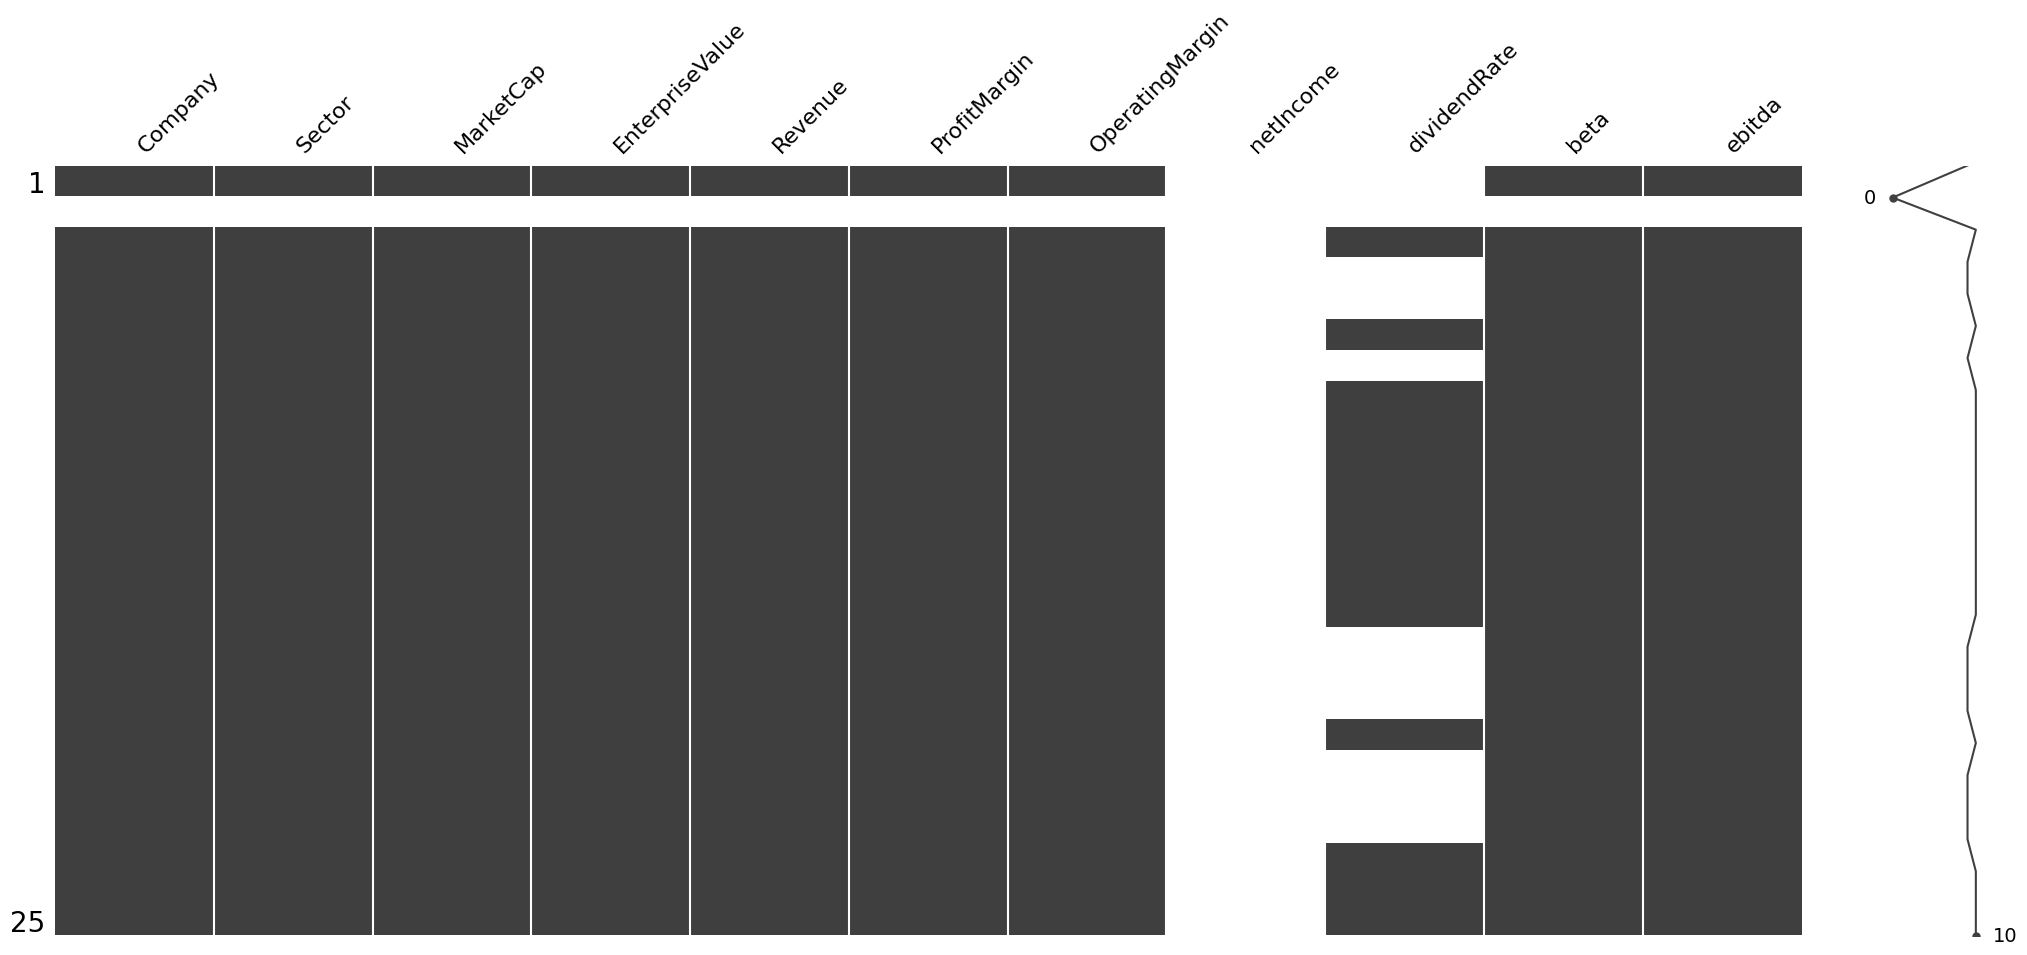

In [88]:
#ver o na

msno.matrix(df)
plt.show()

In [89]:
#Univariate Analysis

<Axes: >

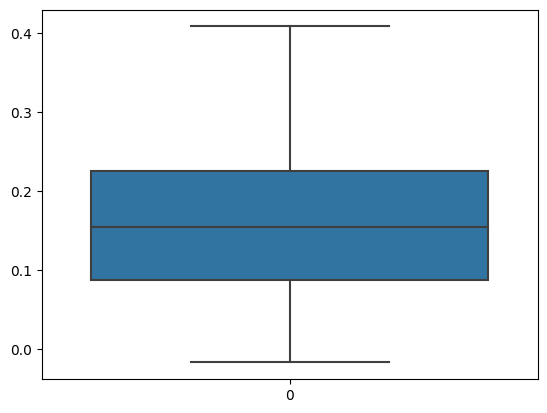

In [90]:
# seaborn use

sns.boxplot(df['ProfitMargin'])

<Axes: >

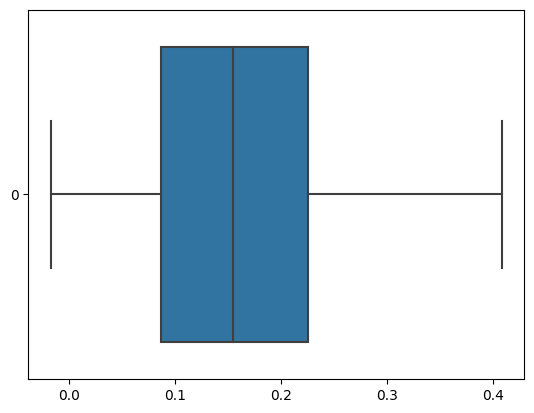

In [91]:
# seaborn use
sns.boxplot(df['ProfitMargin'], orient='h')

<Axes: >

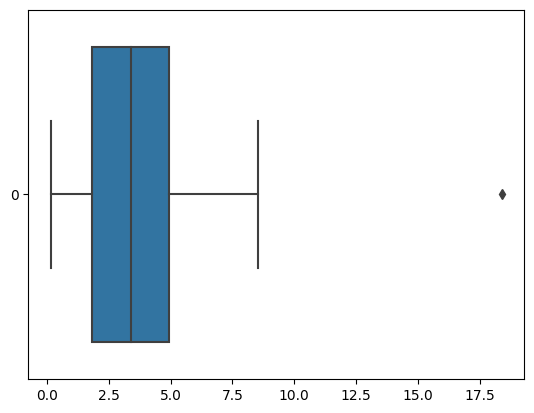

In [92]:
#existe um outlier
sns.boxplot(df['dividendRate'], orient='h')
#it look like a outlier there

<Axes: xlabel='dividendRate', ylabel='Count'>

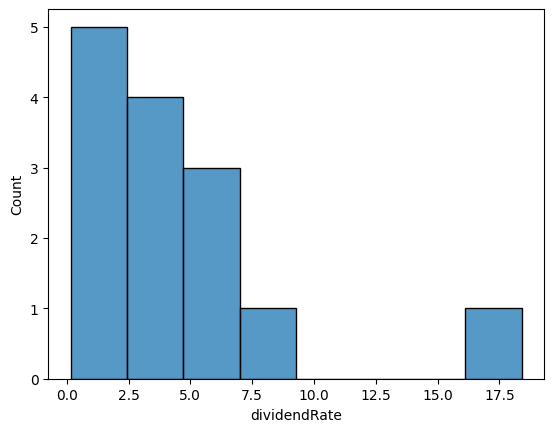

In [93]:
#parecido mas não evidencia o outlier
sns.histplot(df['dividendRate'])
# more  outliers // dividendRate is a good indicator however  we sould analise others periods

<Axes: >

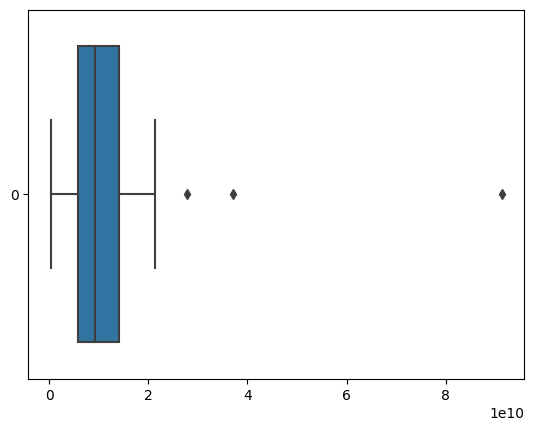

In [94]:
# seaborn use
sns.boxplot(df['ebitda'], orient='h')

In [95]:
df['ebitda'].describe()

count    2.400000e+01
mean     1.432605e+10
std      1.855630e+10
min      3.458420e+08
25%      5.860288e+09
50%      9.213000e+09
75%      1.417025e+10
max      9.137400e+10
Name: ebitda, dtype: float64

In [96]:
df.describe()

,MarketCap,EnterpriseValue,Revenue,ProfitMargin,OperatingMargin,dividendRate,beta,ebitda
count,2.400000e+01,2.400000e+01,2.400000e+01,24.000000,24.000000,14.000000,24.000000,2.400000e+01
mean,2.549166e+11,2.712038e+11,5.517242e+10,0.169854,0.225190,4.373571,0.987036,1.432605e+10
std,3.856677e+11,3.682197e+11,6.985395e+10,0.111751,0.129084,4.592126,0.428651,1.855630e+10
min,2.158464e+10,1.564181e+10,4.463742e+09,-0.017060,-0.044430,0.160000,-0.217804,3.458420e+08
25%,1.029226e+11,1.128235e+11,1.872300e+10,0.086940,0.160115,1.805000,0.750172,5.860288e+09
50%,1.453186e+11,1.606935e+11,3.240372e+10,0.154310,0.225255,3.400000,1.033079,9.213000e+09
75%,2.064945e+11,2.585333e+11,5.416700e+10,0.225070,0.307978,4.927500,1.297021,1.417025e+10
max,1.717155e+12,1.636011e+12,2.895310e+11,0.408430,0.460260,18.400000,1.753377,9.137400e+10


In [97]:
df.describe(include='object')

,Company,Sector,netIncome
count,24,24,0
unique,24,7,0
top,Alphabet Inc.,Technology,NaN
freq,1,8,NaN


In [98]:
#Bivariate Analysis

df.groupby('Sector')['MarketCap'].sum().reset_index().sort_values('MarketCap', ascending=False)

,Sector,MarketCap
6,Technology,2.426757e+12
0,Communication Services,2.325501e+12
2,Consumer Defensive,5.773330e+11
4,Healthcare,3.847941e+11
1,Consumer Cyclical,2.272936e+11
5,Industrials,1.053946e+11
3,Financial Services,7.092568e+10


<Axes: xlabel='MarketCap', ylabel='ebitda'>

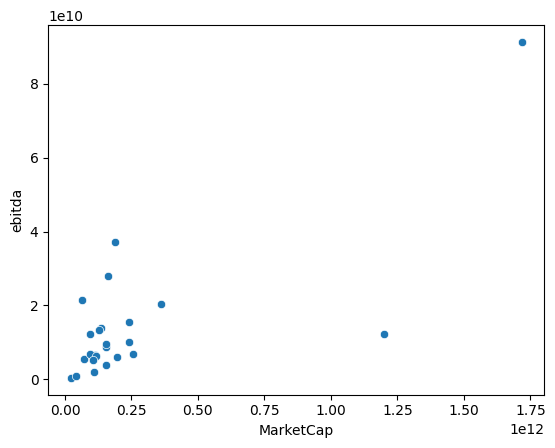

In [99]:
sns.scatterplot(data=df, x="MarketCap", y='ebitda')
#linear relation between - is it true?

<Axes: xlabel='EnterpriseValue', ylabel='ebitda'>

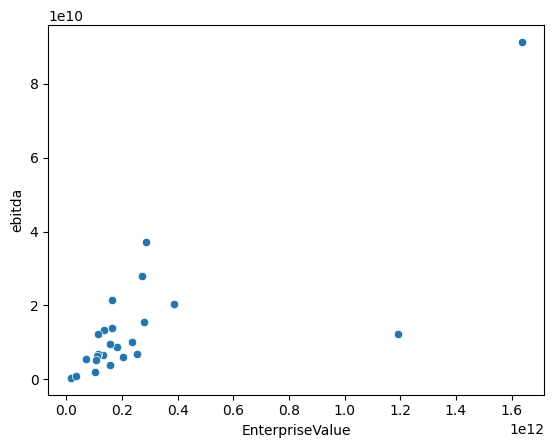

In [100]:
sns.scatterplot(data=df, x="EnterpriseValue", y='ebitda')

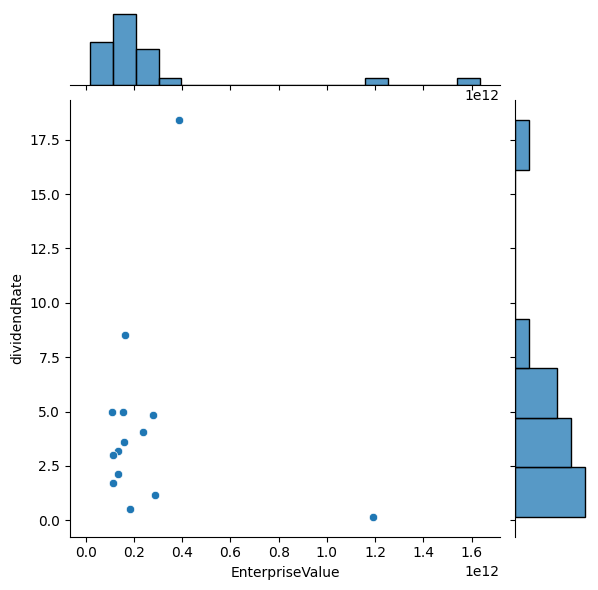

In [101]:
sns.jointplot(x='EnterpriseValue', y='dividendRate', data=df, kind='scatter')

In [102]:
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-102-f471181e404f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,MarketCap,EnterpriseValue,Revenue,ProfitMargin,OperatingMargin,dividendRate,beta,ebitda
MarketCap,1.000000,0.995406,0.611983,0.277619,0.209274,-0.078774,0.267615,0.758640
EnterpriseValue,0.995406,1.000000,0.621191,0.256309,0.212236,-0.080771,0.257660,0.782151
Revenue,0.611983,0.621191,1.000000,-0.253802,-0.203361,-0.111812,-0.087369,0.782787
ProfitMargin,0.277619,0.256309,-0.253802,1.000000,0.921591,0.564848,0.365737,0.045652
OperatingMargin,0.209274,0.212236,-0.203361,0.921591,1.000000,0.550203,0.211318,0.155643
dividendRate,-0.078774,-0.080771,-0.111812,0.564848,0.550203,1.000000,-0.064515,0.166641
beta,0.267615,0.257660,-0.087369,0.365737,0.211318,-0.064515,1.000000,-0.009883
ebitda,0.758640,0.782151,0.782787,0.045652,0.155643,0.166641,-0.009883,1.000000


<Axes: >

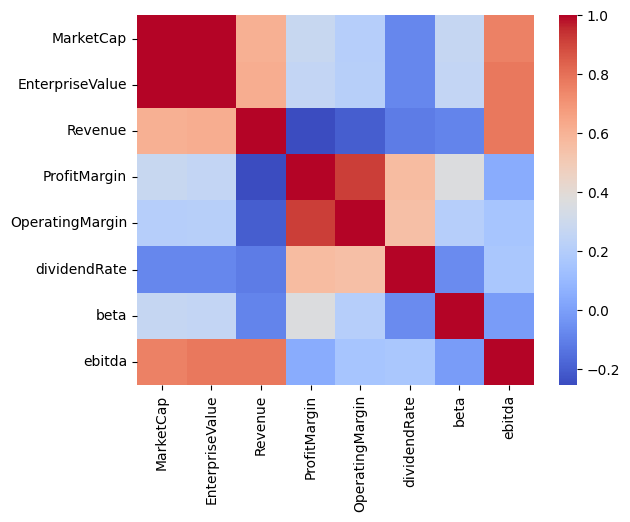

In [103]:
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

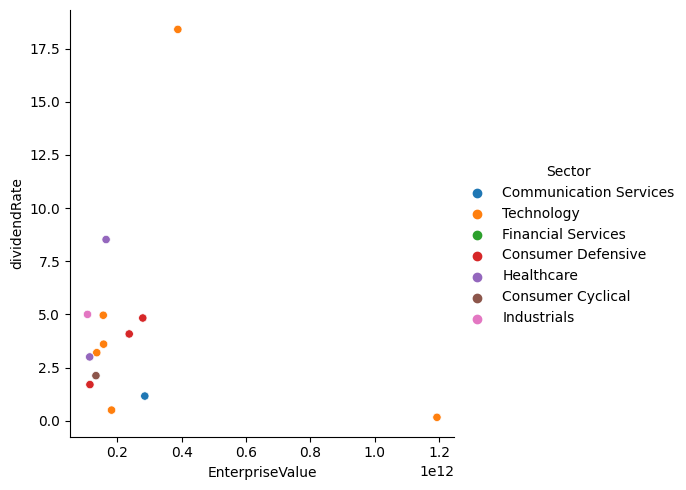

In [104]:
#Multivariate Analysis
sns.relplot(x='EnterpriseValue', y='dividendRate', hue='Sector', data=df)

<Axes: xlabel='EnterpriseValue', ylabel='dividendRate'>

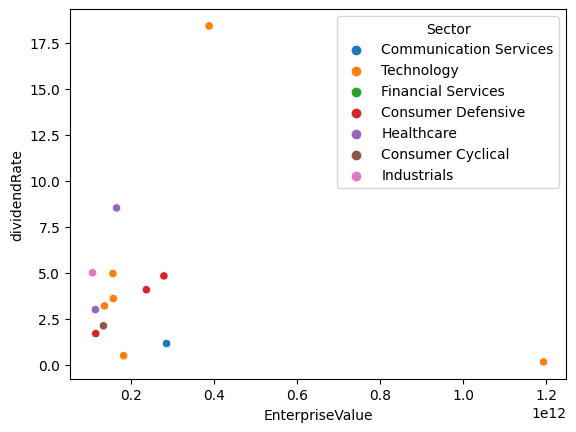

In [105]:
sns.scatterplot(data=df, x='EnterpriseValue', y='dividendRate', hue='Sector')

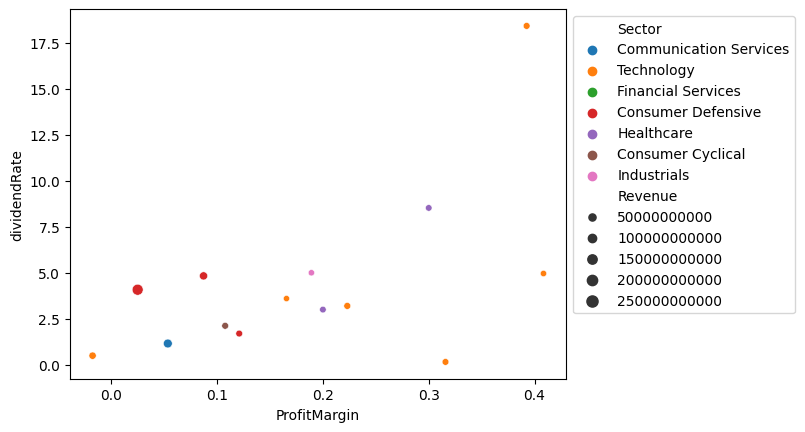

In [108]:
sns.scatterplot(data=df,
                x='ProfitMargin',
                y='dividendRate',
                hue='Sector',
                size='Revenue')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))